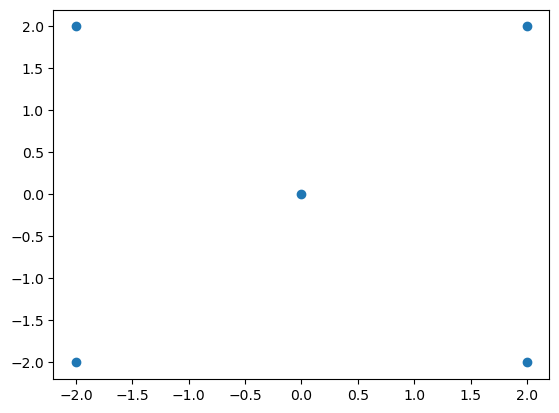

In [507]:
#1 having fixed points  we get the point moving toward them depending on 
# the strength of pulling to the given fixed point

# importing two required module 
import numpy as np
import matplotlib.pyplot as plt
import toolz
import optax
import jax.numpy as jnp
import jax
from flax import linen as nn


def get_contribution_in_axes(fixed_point,strength):
    # print(f"fixed_point {fixed_point} strength {strength}")
    e_x= jnp.array([1.0,0.0])
    e_y= jnp.array([0.0,1.0])
    x=optax.cosine_similarity(e_x,fixed_point)*strength
    y=optax.cosine_similarity(e_y,fixed_point)*strength
    return jnp.array([x,y])
v_get_contribution_in_axes=jax.vmap(get_contribution_in_axes)



points_const= jnp.array([[-2.0,-2.0],[-2.0,2.0],[2.0,2.0],[2.0,-2.0]])
# points_const= jnp.array([[2.0,2.0],[2.0,4.0],[4.0,4.0],[4.0,2.0]])
attraction_strength=jnp.array([1.0,1.0,1.0,1.0])



to_move=v_get_contribution_in_axes(points_const,attraction_strength)


# to_move=list(map(lambda tuple: get_contribution_in_axes(tuple[0],tuple[1]), list(zip(points_const,attraction_strength ) )))
# to_move=jnp.stack(to_move)
calced=jnp.sum(to_move,axis=0)
calced= jnp.expand_dims(calced,axis=0)

points_const= jnp.concatenate([points_const,calced],axis=0)
X,Y=list(toolz.sandbox.core.unzip(points_const))
X=list(X)
Y=list(Y)
plt.scatter(X,Y)
plt.show()


# optax.cosine_distance(jnp.array([[2.0,2.0]]),jnp.array([[2.0,2.0]]))

grid_b_points_x (7, 6, 2) grid_b_points_y (6, 7, 2) grid_c_points (7, 7, 2)


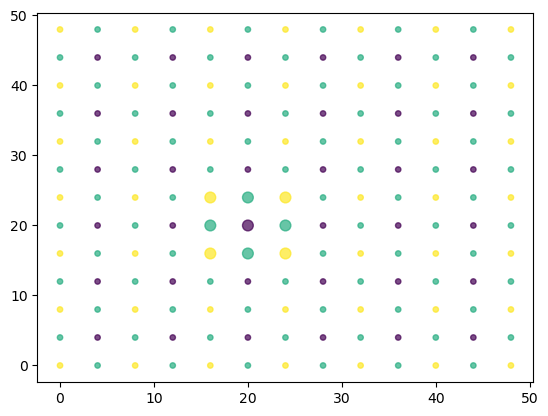

grid_a_points (6, 6, 2) grid_b_points_x (7, 6, 2) grid_b_points_y (6, 7, 2) grid_c_points (7, 7, 2)


In [508]:
import einops
""" 
grid_b - green
grid_a - black
grid_c - yellow
now we need to 
1) given black are sv centers ; green will move only between centers; yellow will be moved using get_contribution_in_axes
    we will give some random floats as weights here and observe how it will look like
2) given some additional points that is not currently in the grid we will want to establish in which sv it is and mark this one in the display
"""

r=8
half_r=r/2
diam_x=48+r
diam_y=48+r
gridd=einops.rearrange(jnp.mgrid[r:diam_x:r, r:diam_y:r],'c x y-> x y c')-half_r
gridd_bigger=einops.rearrange(jnp.mgrid[0:diam_x+r:r,0:diam_y+r:r],'c x y-> x y c')-half_r



# r=1
# half_r=r/2
# gridd=einops.rearrange(jnp.mgrid[0:6, 0:6],'c x y-> x y c')
# gridd_bigger=einops.rearrange(jnp.mgrid[-1:7, -1:7],'c x y-> x y c')





# r=4
# half_r=r/2
# gridd=einops.rearrange(jnp.mgrid[half_r:12-half_r:half_r, half_r:12-half_r:half_r],'c x y-> x y c')
# gridd_bigger=einops.rearrange(jnp.mgrid[0:12:half_r, 0:12:half_r],'c x y-> x y c')

# gridd=einops.rearrange(gridd,'(a e d) c-> d e a c', d=2,e=2)
grid_a_points=gridd
grid_b_points_x= (gridd_bigger+jnp.array([half_r,0.0]))[0:-1,1:-1,:]
grid_b_points_y= (gridd_bigger+jnp.array([0,half_r]))[1:-1,0:-1,:]

grid_c_points=(gridd_bigger+jnp.array([half_r,half_r]))[0:-1,0:-1,:]

print(f"grid_b_points_x {grid_b_points_x.shape} grid_b_points_y {grid_b_points_y.shape} grid_c_points {grid_c_points.shape}")


def disp_grid(grid_a_points,grid_b_points_x,grid_b_points_y,grid_c_points):

    c_a=np.ones_like(grid_a_points[:,:,1])-0.9
    c_b_x=np.ones_like(grid_b_points_x[:,:,1])+0.9
    c_b_y=np.ones_like(grid_b_points_y[:,:,1])+0.9
    c_c=np.ones_like(grid_c_points[:,:,1])+2.0


    s_a=np.ones_like(grid_a_points[:,:,1])
    s_b_x=np.ones_like(grid_b_points_x[:,:,1])
    s_b_y=np.ones_like(grid_b_points_y[:,:,1])
    s_c=np.ones_like(grid_c_points[:,:,1])
    base_x=2
    base_y=2

    s_a[base_x,base_y]=s_a[0,0]*4
    s_b_x[base_x,base_y]=s_b_x[0,0]*4
    s_b_y[base_x,base_y]=s_b_y[0,0]*4
    s_b_x[base_x+1,base_y]=s_b_x[0,0]*4
    s_b_y[base_x,base_y+1]=s_b_y[0,0]*4

    s_c[base_x,base_y]=s_c[0,0]*4
    s_c[base_x,base_y+1]=s_c[0,0]*4
    s_c[base_x+1,base_y]=s_c[0,0]*4
    s_c[base_x+1,base_y+1]=s_c[0,0]*4


    grid_b_points_x=einops.rearrange(grid_b_points_x,'x y c-> (x y) c')
    grid_b_points_y=einops.rearrange(grid_b_points_y,'x y c-> (x y) c')
    grid_c_points=einops.rearrange(grid_c_points,'x y c-> (x y) c')
    grid_a_points=einops.rearrange(grid_a_points,'x y c-> (x y) c')

    grid_b_points= jnp.concatenate([grid_b_points_x,grid_b_points_y])
    x=jnp.concatenate([grid_a_points[:,0],grid_b_points[:,0],grid_c_points[:,0]])
    y=jnp.concatenate([grid_a_points[:,1],grid_b_points[:,1],grid_c_points[:,1]])

    c= jnp.concatenate([c_a.flatten(),c_b_x.flatten(),c_b_y.flatten(),c_c.flatten()])
    s=jnp.concatenate([s_a.flatten(),s_b_x.flatten(),s_b_y.flatten(),s_c.flatten()])*15
    plt.scatter(x,y,s=s,c=c,alpha=0.7)
    plt.show()


disp_grid(grid_a_points,grid_b_points_x,grid_b_points_y,grid_c_points)

print(f"grid_a_points {grid_a_points.shape} grid_b_points_x {grid_b_points_x.shape} grid_b_points_y {grid_b_points_y.shape} grid_c_points {grid_c_points.shape}")

In [509]:
jnp.max(grid_a_points)


Array(44., dtype=float32)

In [510]:
# grid_b_points_x=einops.rearrange(grid_b_points_x,'x y c-> (x y) c')
# grid_b_points_y=einops.rearrange(grid_b_points_y,'x y c-> (x y) c')
# grid_c_points=einops.rearrange(grid_c_points,'x y c-> (x y) c')
# grid_a_points=einops.rearrange(grid_a_points,'x y c-> (x y) c')

sv_center=grid_a_points[0,0,:]
grid_b_points_x[1,0,:]

Array([8., 4.], dtype=float32)

grid_b_points_x (7, 6, 2) grid_b_points_x_weights (7, 6, 2) 
ccc calced (2,)  grid_c_point (2,) 
  Traced<ShapedArray(float32[])>with<BatchTrace(level=2/0)> with
  val = Traced<ShapedArray(float32[7])>with<BatchTrace(level=1/0)> with
    val = Array([[ 3.,  3.,  3.,  3., -3.,  3., -1.],
       [ 3.,  3.,  3.,  3.,  3., -3.,  3.],
       [ 0.,  3., -3., -3., -3., -3.,  3.],
       [-3., -3., -3.,  3., -3.,  3., -3.],
       [-3., -1., -3., -3.,  3.,  3., -0.],
       [-3., -3.,  3.,  3.,  3.,  3.,  0.],
       [-3.,  3.,  3., -3.,  3., -3., -3.]], dtype=float32)
    batch_dim = 0
  batch_dim = 0


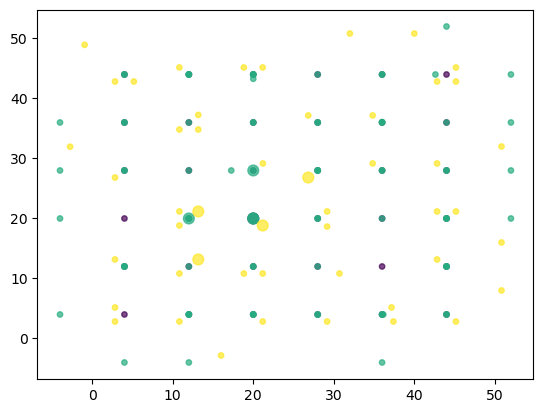

In [511]:
""" 
grid_a_points represent grid centers - we need also to have weights that are associated with sv and that will be used to controll sv geometry
entry 0 and 1 - for strenth up and down x axis
2 and 3 = for strenth up and down y axis
4- up_x,up_y
5- up_x,down_y
6- down_x,up_y
7- down_x,down_y
"""
# weights=np.ones((grid_a_points.shape[0],grid_a_points.shape[1],8))*2
weights=(np.random.random((grid_a_points.shape[0],grid_a_points.shape[1],8))-0.5)*2
# weights=np.ones_like(weights)#*110000000.0
# weights[2,2,:]=-10000.0


def get_4_point_loc(points_const,point_weights,half_r):
    half_r_bigger=half_r#*1.2
    calced=v_get_contribution_in_axes(points_const,point_weights)
    # calced=calced/jnp.sum(calced.flatten())
    # calced=calced*einops.repeat(point_weights,'a->a b',b=2)
    # calced= nn.softmax(calced*10,axis=-1)
    
    calced=jnp.sum(calced,axis=0)
    # calced=calced/(jnp.max(calced.flatten())+0.00001)
    return calced*half_r_bigger

def get_b_x_weights(weights):
    weights_curr=weights[:,:,0:2] 
    grid_b_points_x_weights_0=np.pad(weights_curr[:,:,0],((1,0),(0,0)))
    grid_b_points_x_weights_1=np.pad(weights_curr[:,:,1],((0,1),(0,0)))
    grid_b_points_x_weights= np.stack([grid_b_points_x_weights_0,grid_b_points_x_weights_1],axis=-1)

    return nn.softmax(grid_b_points_x_weights*100,axis=-1)


def get_b_y_weights(weights):
    weights_curr=weights[:,:,2:4] 
    grid_b_points_y_weights_0=np.pad(weights_curr[:,:,0],((0,0),(1,0)))
    grid_b_points_y_weights_1=np.pad(weights_curr[:,:,1],((0,0),(0,1)))
    grid_b_points_y_weights= np.stack([grid_b_points_y_weights_0,grid_b_points_y_weights_1],axis=-1)

    return nn.softmax(grid_b_points_y_weights*100,axis=-1)


grid_b_points_x_weights=get_b_x_weights(weights)
grid_b_points_y_weights=get_b_y_weights(weights)


def get_for_four_weights(weights):
    """ 
        4- up_x,up_y
        5- up_x,down_y
        6- down_x,up_y
        7- down_x,down_y
    """
    up_x_up_y=np.pad(weights[:,:,4],((1,0),(1,0)))
    up_x_down_y=np.pad(weights[:,:,5],((1,0),(0,1)))
    down_x_up_y=np.pad(weights[:,:,6],((0,1),(1,0)))
    down_x_down_y=np.pad(weights[:,:,7],((0,1),(0,1)))

    grid_c_points_weights=np.stack([up_x_up_y,up_x_down_y,down_x_up_y,down_x_down_y],axis=-1)
    # print(f"grid_c_points_weights in get_for_four_weights {grid_c_points_weights} \n \n ")

    # print(f"grid_c_points {grid_c_points.shape} grid_c_points_weights {grid_c_points_weights.shape}")
    # return nn.tanh(grid_c_points_weights*100) 
    return nn.softmax(grid_c_points_weights*100,axis=-1) 

def apply_for_four_weights(grid_c_points_weight,grid_c_point,half_r):
    points_const=jnp.stack([  jnp.array([-half_r,-half_r])
                              ,jnp.array([-half_r,half_r])
                              ,jnp.array([half_r,-half_r])
                              ,jnp.array([half_r,half_r])
                              ],axis=0)
    # points_const=jnp.stack([  grid_c_point+jnp.array([-half_r,-half_r])
    #                           ,grid_c_point+jnp.array([-half_r,half_r])
    #                           ,grid_c_point+jnp.array([half_r,-half_r])
    #                           ,grid_c_point+jnp.array([half_r,half_r])
    #                           ],axis=0)
    calced=get_4_point_loc(points_const,grid_c_points_weight,half_r)
    print(f"ccc calced {calced.shape}  grid_c_point {grid_c_point.shape} \n  {jnp.round(calced)[0]}")

    return calced+grid_c_point
v_apply_for_four_weights=jax.vmap(apply_for_four_weights,in_axes=(0,0,None))
v_v_apply_for_four_weights=jax.vmap(v_apply_for_four_weights,in_axes=(0,0,None))


def move_in_axis(point,weights,axis,half_r ):
    """ 
    point can move up or down axis no more than half_r from current position 
    weights indicate how strongly it shoul go down (element 0) and up the axis  
    """
    return point.at[axis].set(point[axis]-weights[0]*half_r + weights[1]*half_r)
v_move_in_axis= jax.vmap(move_in_axis,in_axes=(0,0,None,None))
v_v_move_in_axis= jax.vmap(v_move_in_axis,in_axes=(0,0,None,None))

print(f"grid_b_points_x {grid_b_points_x.shape} grid_b_points_x_weights {grid_b_points_x_weights.shape} ")

grid_b_points_x=v_v_move_in_axis(grid_b_points_x,grid_b_points_x_weights,0, half_r)
grid_b_points_y=v_v_move_in_axis(grid_b_points_y,grid_b_points_y_weights,1, half_r)

grid_c_points_weights=get_for_four_weights(weights)
grid_c_points=v_v_apply_for_four_weights(grid_c_points_weights,grid_c_points,half_r)



disp_grid(grid_a_points,grid_b_points_x,grid_b_points_y,grid_c_points)


In [512]:
points_const=jnp.stack([  jnp.array([-half_r,-half_r])
                            ,jnp.array([-half_r,half_r])
                            ,jnp.array([half_r,-half_r])
                            ,jnp.array([half_r,half_r])
                            ],axis=0)
print(f"points_const {points_const} \n \n")

weightss=get_for_four_weights(jnp.array( [[[100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0]]]))
print(f"weightss {weightss} \n \n")

def get_4_point_loc_a(points_const,point_weights,half_r):
    calced=get_contribution_in_axes(points_const,point_weights)
    print(f"calced contribution in axes {jnp.round(calced,2)} \n \n ")
    calced=jnp.sum(calced,axis=-1)
    calced= calced/jnp.sum(calced.flatten())*half_r
    return calced
aa=get_4_point_loc_a(points_const,weightss[0,0,:],half_r)
aa


points_const [[-4. -4.]
 [-4.  4.]
 [ 4. -4.]
 [ 4.  4.]] 
 

weightss [[[0. 0. 0. 1.]
  [0. 0. 1. 0.]]

 [[0. 1. 0. 0.]
  [1. 0. 0. 0.]]] 
 

calced contribution in axes [[-0.   -0.    0.    0.71]
 [-0.    0.   -0.    0.71]] 
 
 


Array([2., 2.], dtype=float32)

In [513]:
nn.softmax(jnp.array([1.0,0.0,0.0,0.0]))

Array([0.47536692, 0.17487772, 0.17487772, 0.17487772], dtype=float32)

In [514]:
# grid_b_points_x_weights=einops.rearrange(grid_b_points_x_weights,'x y c-> (x y) c')
# print(f"grid_b_points_x_weights {grid_b_points_x_weights.shape}")

# def apply_weights_per_sv(grid_a_points,grid_b_points_x,grid_b_points_y,grid_c_points,half_r):
#     #get grid_b_points_x modifications
#     w_b_x_0=jnp.concatenate( )


# grid_a - black
# grid_b - green
# grid_c - yellow

    # s_a[1,1]=s_a[0,0]*4
    # s_b_x[1,1]=s_b_x[0,0]*4
    # s_b_x[2,1]=s_b_x[0,0]*4

    # s_b_y[1,1]=s_b_y[0,0]*4
    # s_b_y[1,2]=s_b_y[0,0]*4

    # s_c[1,1]=s_c[0,0]*4
    # s_c[1,2]=s_c[0,0]*4
    # s_c[2,1]=s_c[0,0]*4
    # s_c[2,2]=s_c[0,0]*4




# grid_b_points_x_weights= np.random.random(grid_b_points_x.shape)
# grid_b_points_y_weights= np.random.random(grid_b_points_y.shape)
# grid_c_points_weights= np.random.random(grid_c_points.shape[0],4)

# def get_simple_4_point():
    


def differentiable_abs(x):
    """ 
    differentiable approximation of absolute value function
    """
    a=4.0
    return x*np.tanh(a*x)



In [515]:


def get_triangle_area(p_0,p_1,p_2):
    area = 0.5 * (p_0[0] * (p_1[1] - p_2[1]) + p_1[0] * (p_2[1] - p_0[1]) + p_2[0]
                  * (p_0[1] - p_1[1]))
    return differentiable_abs(area)
    # return area


# def triangleArea(Point p1, Point p2, Point p3) :         //find area of triangle formed by p1, p2 and p3
#    return abs((p1.x*(p2.y-p3.y) + p2.x*(p3.y-p1.y)+ p3.x*(p1.yp2.y))/2.0);



# Area =
# 1
# 2
# [x1(y2 - y3) + x2(y3 - y1) + x3(y1 - y2)]


def is_point_in_triangle(test_point,sv_center,control_point_a,control_point_b):
    """ 
    basic idea is that if a point is inside the triangle and we will create 3 sub triangles inside 
    where the new point is the apex and the bases are the 3 edges of the tested triangles
    if the sum of the areas of the sub triangles is equal the area of tested triangle the point is most probably inside the tested triangle
    if the sum of the subtriangles areas is diffrent then area of tested triangle it is for sure not in the triangle
    tested triangle will be always build from 3 points where sv center is one of them and other 2 points are sv control points
    adapted from https://stackoverflow.com/questions/59597399/area-of-triangle-using-3-sets-of-coordinates
    added power and sigmoid to the end to make sure that if point is in the triangle it will be approximately 0 and otherwise approximately 1
    """
    main_triangle_area= get_triangle_area(sv_center,control_point_a,control_point_b)
    sub_a=get_triangle_area(test_point,control_point_a,control_point_b)
    sub_b=get_triangle_area(sv_center,test_point,control_point_b)
    sub_c=get_triangle_area(sv_center,control_point_a,test_point)

    subtriangles_area= sub_a+sub_b+sub_c
    area_diff=main_triangle_area-subtriangles_area
    area_diff=jnp.power(area_diff,2)
    return (nn.sigmoid(area_diff*5000)-0.5)*2

pointtt= (np.sqrt(32)/2)+0.1
print(f"pointtt {pointtt}")
test_point=[pointtt,pointtt]
sv_center=[1,1]
control_point_a=[1,5]
control_point_b=[5,1]


# krowa we know order of points by construction (at least i suppose) does it let us deal with tanh
# krowa alternative is that we could get the sum of the angles next to the query point sum of those as far as i think should be always 360 degrees

valll=is_point_in_triangle(test_point,sv_center,control_point_b,control_point_a)
valll


pointtt 2.9284271247461904


Array(0.9999981, dtype=float32)

In [516]:
np.sum(np.array([1,-2,4])/3)

1.0

In [517]:
pointtt= np.sqrt(32)/2
test_point=jnp.array([pointtt,pointtt]).astype(float)
sv_center=jnp.array([1,1]).astype(float)
control_point_a=jnp.array([1,5]).astype(float)
control_point_b=jnp.array([5,1]).astype(float)

def get_projection_diff(a,b,epsilon):
    """ 
    if will return negative number it is outside of the triangle in given direction
    I added tanh to keep it always between -1 and 1
    """
    return ((jnp.dot(a, b) / (jnp.dot(b, b) + epsilon)) * b)- jnp.sqrt(jnp.dot(b,b))
    # return ((jnp.dot(a, b) / jnp.dot(b, b)) * b)-jax.numpy.linalg.norm(b, ord=2)
    # return jnp.dot(a, b)/jax.numpy.linalg.norm(a, ord=2)
# on_a=jnp.dot(control_point_a-sv_center,test_point-sv_center)
# on_b=jnp.dot(control_point_b-sv_center,test_point-sv_center)
# on_a=get_projection(test_point-sv_center,control_point_a-sv_center)
# on_b=get_projection(test_point-sv_center,control_point_b-sv_center)
epsilon=0.00000000000001
on_a=get_projection_diff(control_point_a-sv_center,test_point-sv_center,epsilon)
on_b=get_projection_diff(control_point_b-sv_center,test_point-sv_center,epsilon)
print(f"on_a {on_a} on_b {on_b}")

on_a [-0.58578646 -0.58578646] on_b [-0.58578646 -0.58578646]


In [518]:
x = [1, 1, 5]
y = [1, 5, 1]


def get_area(x, y):
    area = 0.5 * (x[0] * (y[1] - y[2]) + x[1] * (y[2] - y[0]) + x[2]
                  * (y[0] - y[1]))
    return int(area)


coords = zip(x, y)
print('Area of points {}, {}, {} is {}'.format(*coords, get_area(x, y)))

Area of points (1, 1), (1, 5), (5, 1) is -8


In [519]:
from jax.scipy import ndimage as jndimage

aa= jnp.ones((5,5))
aa=aa.at[2,2].set(3)
# grid_x, grid_y = np.meshgrid(np.arange(aa.shape[1]), np.arange(aa.shape[0]))
# # jax.scipy.ndimage.map_coordinates(aa,jnp.array([1,1]),order=3)
# coords=jnp.stack([grid_x, grid_y])
# print(f" coords prim {coords.shape} ")
coords=jnp.array([[2.8,2.8],[2.1,2.1]])
coords=einops.rearrange(coords,'a c -> c a 1')
jndimage.map_coordinates(aa, coords, order=1)
# coords.shape

Array([[1.08     ],
       [2.6200004]], dtype=float32)

In [520]:
def analyze_single_sv(sv_center_coord, back_x,front_x,back_y,front_y,up_x_up_y,up_x_down_y,down_x_up_y,down_x_down_y,half_r):
    """ 
    gets a sv and the positions of its control points to establish which points in a set 
    pixel grid are in the currently analyzed sv
    as we are working per area we need also to take into account added padding in order to 
    adjust coordinates
    """


    

    # s_a[1,1]=s_a[0,0]*4
    # s_b_x[1,1]=s_b_x[0,0]*4
    # s_b_y[1,1]=s_b_y[0,0]*4
    # s_b_x[2,1]=s_b_x[0,0]*4
    # s_b_y[1,2]=s_b_y[0,0]*4

    # s_c[1,1]=s_c[0,0]*4
    # s_c[1,2]=s_c[0,0]*4
    # s_c[2,1]=s_c[0,0]*4
    # s_c[2,2]=s_c[0,0]*4


# is_point_in_triangle(test_point,sv_center,control_point_a,control_point_b)
grid_a_points.shape

(6, 6, 2)

In [521]:
beg=0.0
end=10.0
control = 4.0
p_test=3.0
nn.sigmoid( (control-p_test)*100 )

Array(1., dtype=float32, weak_type=True)

In [522]:
    grid_a_points=einops.rearrange(grid_a_points,'x y c-> (x y) c')
    grid_b_points_x=einops.rearrange(grid_b_points_x,'x y c-> (x y) c')
    grid_b_points_y=einops.rearrange(grid_b_points_y,'x y c-> (x y) c')
    grid_c_points=einops.rearrange(grid_c_points,'x y c-> (x y) c')

In [523]:
""" 
we will analize the squares where svs are their corners 
in the borders of those squares the point ownership will be decided based just on "green points" so only 2 svs will fight for ownership
i all of the rst all 4 svs - that are constituting the corners will compete for point ownership and all triangles in this square needs to be taken into account
we have unfortunately special cases on the borders where we do not have svs in some directions we will deal with the issue by padding it so we will just add padding

additionally when analyzing triangles we would have 4 diffrent possible ids of the corner svs - let's call them alpha beta delta and gamma 
so in alpha upper left corner will have id 0 upper left id 1 upper right id 2 lower right id 3 lower left ... and beta delta and gamma will have accordingly to keep the ids consistent
"""
def get_triangles_data():
    """ 
    manually setting data about what triangles are present in each square 
    it is based on set of sv centers and control points - also comments are to the upper left square of the image in 
    /workspaces/jax_cpu_experiments_b/geometric_sv_idea/triangle_geometric_sv.jpg
    we will also use the id of nodes as in the image bottom right
    single triangle data will consist of 4 entries - first 3 will be verticies ids as in image and the last one the id of the sv that is owner of this node
        as in the alpha order 
    """
    return jnp.array(
         [[0,8,1,0]#A
         ,[0.1,2,0]#B
         ,[0,2,3,1]#C
         ,[0,3,4,1]#D
         ,[0,4,5,2]#L
         ,[0,5,6,2]#K
         ,[0,6,7,3]#J
         ,[0,7,8,3]]#I
        )

def analyze_single_triangle(curried,triangle_dat):
    """ 
    given a point it is designed to be scanned over triangles
    """
    x_y,control_points_coords,res=curried
    is_in=is_point_in_triangle(x_y,control_points_coords[triangle_dat[0],:],control_points_coords[triangle_dat[1],:],control_points_coords[triangle_dat[3],:])
    return (x_y,control_points_coords,res.at[triangle_dat[3]].set(res[triangle_dat[3]]+is_in ))


def analyze_single_point(x_y,triangles_data,control_points_coords):
    """ 
    analyze thepoints of sv area (apart from edges) by checking it against the triangles
    we will scan over those triangles and return array of length 4 that will indicate to which sv given point is attached
    x_y - array with 2 entries indicating x and y coordinates of currently analyzed point
    triangles_data - constants describing points and to which sv they belong
    control_points_coords - coordinates of the sv centers and control points in order as indicated at image 
        /workspaces/jax_cpu_experiments_b/geometric_sv_idea/triangle_geometric_sv.jpg
    """
    curried=x_y,control_points_coords,jnp.zeros(4)
    res,_= jax.lax.scan(analyze_single_triangle,curried, triangles_data)
    return res[2]

v_analyze_single_point=jax.vmap(analyze_single_point,in_axes=(0,None,None))
v_v_analyze_single_point=jax.vmap(v_analyze_single_point,in_axes=(0,None,None))

def analyze_point_linear(curr_point, control_point,channel_up,channel_down):
    """ 
    as we are analyzing bottom and right border as lines we are just intrested weather given point is up or 
        down the axis from control point
    curr_point - float representing the position in axis of intrest of the point currently analyzed
    control_point - float representing the position in axis of intrest of the point currently analyzed
    channel_up - the channel owned by the sv up the axis
    channel_down - the channel owned by the sv down the axis
    """
    #will give close to 1 if test point is maller than control
    is_test_smaller_than_control=nn.sigmoid( (control_point-curr_point)*100 )
    res=jnp.zeros(4)
    res=res.at[channel_up].set(1-is_test_smaller_than_control)
    res=res.at[channel_down].set(is_test_smaller_than_control)
    return res

v_analyze_point_linear= jax.vmap(analyze_point_linear,in_axes=(0,None,None,None))

def analyze_square(diameter,triangles_data,control_points_coords):
    """ 
    analyzing single square where each corner is created by sv center
    triangles_data- constants describing triangles specified in get_triangles_data function
    diameter - diameter of sv area - what is important the right and bottom edges will be treated separately as their ownership calculations do not require triangle analysis
    """
    #get grid of points and apply analyze_single_point ignoring left and bottom borders for now
    grid=einops.rearrange(jnp.mgrid[0:diameter, 0:diameter],'c x y-> x y c')
    grid_right= grid[-1,:,:]
    grid_bottom= grid[:,-1,:]
    grid=grid[0:-1,0:-1,:]
    res=v_v_analyze_single_point(grid,triangles_data,control_points_coords)
    #analyze bottom and right border we assume that we are in square alpha so right border is between sv 1vs2 and bottom 2 vs 3
    bottom
    

    #reshuffle the order of channels so they id of svs will be consistent between areas

    #return 4 channel array where each channel tell about given sv and weather this point is owned but that sv


def analyze_all_control_points():
    #pad the grid control points so we can divide it

    #reshape control points so they can be used in vmap 
    
    #join control points and sv centers in control_points_coords in the order as indicated in image /workspaces/jax_cpu_experiments_b/geometric_sv_idea/triangle_geometric_sv.jpg

    #vmap over analyze_square




SyntaxError: incomplete input (8032602.py, line 103)